# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

a:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Number of classes: 100


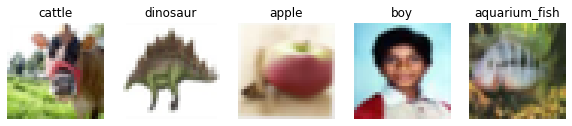

In [2]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

def plot_examples(images, labels, class_names, num_examples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# CIFAR-100 class names reference: https://www.cs.toronto.edu/~kriz/cifar.html
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
    'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
    'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
    'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger',
    'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plot_examples(x_train, y_train, fine_label_names)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> *categorial_crossentropy, great for classification tasks with more than two classes*
- <b>Optimizer:</b> *Adam, it combines the advantage of two other extensions of stochastic gradient desent, AdaGrad and RMSProp*

In [12]:
from keras import optimizers

# Your code here
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [14]:
# Your code here

history = model.fit(
    x_train, y_train,
    epochs=15,  
    batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/15
1250/1250 [==============================] - 25s 20ms/step - loss: 4.6104 - accuracy: 0.0097 - val_loss: 4.6097 - val_accuracy: 0.0105
Epoch 2/15
1250/1250 [==============================] - 24s 19ms/step - loss: 4.6101 - accuracy: 0.0094 - val_loss: 4.6108 - val_accuracy: 0.0086
Epoch 3/15
1250/1250 [==============================] - 24s 19ms/step - loss: 4.6101 - accuracy: 0.0094 - val_loss: 4.6100 - val_accuracy: 0.0100
Epoch 4/15
1250/1250 [==============================] - 25s 20ms/step - loss: 4.6107 - accuracy: 0.0092 - val_loss: 4.6114 - val_accuracy: 0.0088
Epoch 5/15
1250/1250 [==============================] - 24s 20ms/step - loss: 4.6104 - accuracy: 0.0093 - val_loss: 4.6097 - val_accuracy: 0.0089
Epoch 6/15
1250/1250 [==============================] - 25s 20ms/step - loss: 4.6106 - accuracy: 0.0093 - val_loss: 4.6106 - val_accuracy: 0.0088
Epoch 7/15
1250/1250 [==============================] - 24s 19ms/step - loss: 4.6107 - accuracy: 0.0090 - val_loss: 4.6102 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> *0.0100*
- <b>Other metric:</b> *F1 Score*
- <b>Reason for selection:</b> *F1 Score is the combination of precision and recall while giving a good balance between the two*
- <b>Value of metric:</b> *0*
- <b>Interpretation of metric value:</b> *It is mostly 0, which is extremely low accuracy*

In [17]:
# Your code here

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}"),

from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

report = classification_report(y_true, y_pred_classes, target_names=fine_label_names, zero_division=1)
print(report)



313/313 [==============================] - 2s 7ms/step - loss: 4.6084 - accuracy: 0.0100
Test accuracy: 0.0100
313/313 [==============================] - 2s 6ms/step
               precision    recall  f1-score   support

        apple       1.00      0.00      0.00       100
aquarium_fish       1.00      0.00      0.00       100
         baby       1.00      0.00      0.00       100
         bear       1.00      0.00      0.00       100
       beaver       1.00      0.00      0.00       100
          bed       1.00      0.00      0.00       100
          bee       1.00      0.00      0.00       100
       beetle       1.00      0.00      0.00       100
      bicycle       1.00      0.00      0.00       100
       bottle       1.00      0.00      0.00       100
         bowl       1.00      0.00      0.00       100
          boy       1.00      0.00      0.00       100
       bridge       1.00      0.00      0.00       100
          bus       1.00      0.00      0.00       100
    butt

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate? <br>*The accuracy plot did not show improvments over each epoch. No, it does not make sense as the training is not making the model better. The classification probabilities is pretty high meaning the model is more likely to generate the wrong  types of classification*

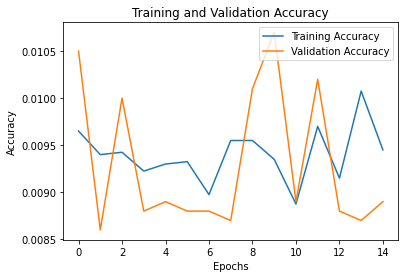

313/313 [==============================] - 2s 6ms/step


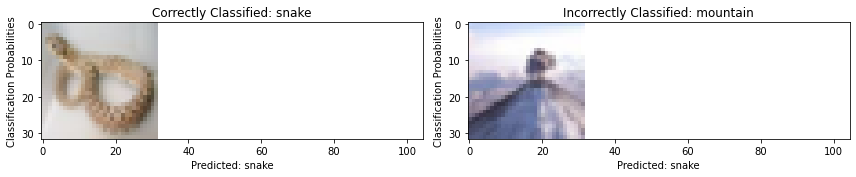

In [19]:
# Your code here

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show(),


y_pred_probs = model.predict(x_test)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f'Correctly Classified: {fine_label_names[y_true_classes[correct_idx]]}')
plt.xlabel(f'Predicted: {fine_label_names[y_pred_classes[correct_idx]]}')
plt.ylabel('Classification Probabilities')
plt.bar(range(100), y_pred_probs[correct_idx])

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f'Incorrectly Classified: {fine_label_names[y_true_classes[incorrect_idx]]}')
plt.xlabel(f'Predicted: {fine_label_names[y_pred_classes[incorrect_idx]]}')
plt.ylabel('Classification Probabilities')
plt.bar(range(100), y_pred_probs[incorrect_idx])

plt.tight_layout()
plt.show()



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [21]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10, 
    validation_data=(x_val, y_val), 
    callbacks=[early_stopping]
)


Epoch 1/10
1250/1250 [==============================] - 60s 47ms/step - loss: 4.3433 - accuracy: 0.0420 - val_loss: 3.9451 - val_accuracy: 0.0989
Epoch 2/10
1250/1250 [==============================] - 60s 48ms/step - loss: 3.9426 - accuracy: 0.0957 - val_loss: 3.6961 - val_accuracy: 0.1354
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 3.7581 - accuracy: 0.1259 - val_loss: 3.5117 - val_accuracy: 0.1694
Epoch 4/10
1250/1250 [==============================] - 59s 47ms/step - loss: 3.6233 - accuracy: 0.1485 - val_loss: 3.3625 - val_accuracy: 0.1993
Epoch 5/10
1250/1250 [==============================] - 61s 49ms/step - loss: 3.4995 - accuracy: 0.1670 - val_loss: 3.2807 - val_accuracy: 0.2095
Epoch 6/10
1250/1250 [==============================] - 61s 49ms/step - loss: 3.4064 - accuracy: 0.1853 - val_loss: 3.1995 - val_accuracy: 0.2291
Epoch 7/10
1250/1250 [==============================] - 61s 49ms/step - loss: 3.3263 - accuracy: 0.1973 - val_loss: 3.0846 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 [==============================] - 4s 12ms/step - loss: 3.0060 - accuracy: 0.2656
Test Accuracy: 0.2656
313/313 [==============================] - 4s 12ms/step
               precision    recall  f1-score   support

        apple       0.59      0.68      0.63       100
aquarium_fish       0.37      0.50      0.42       100
         baby       0.25      0.19      0.22       100
         bear       0.12      0.08      0.10       100
       beaver       0.12      0.05      0.07       100
          bed       0.20      0.22      0.21       100
          bee       0.27      0.23      0.25       100
       beetle       0.28      0.30      0.29       100
      bicycle       0.12      0.28      0.17       100
       bottle       0.49      0.24      0.32       100
         bowl       0.12      0.01      0.02       100
          boy       0.23      0.09      0.13       100
       bridge       0.28      0.28      0.28       100
          bus       0.13      0.44      0.20       100
    bu

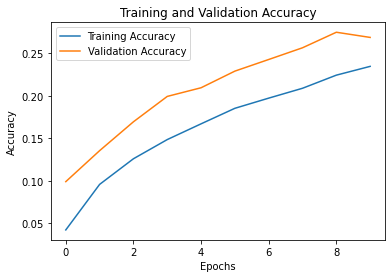

313/313 [==============================] - 4s 12ms/step


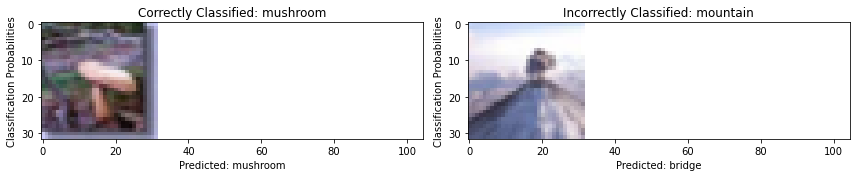

In [24]:
# Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_probs = model.predict(x_test)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=fine_label_names, zero_division=0)),


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show(),


y_pred_probs = model.predict(x_test)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f'Correctly Classified: {fine_label_names[y_true_classes[correct_idx]]}')
plt.xlabel(f'Predicted: {fine_label_names[y_pred_classes[correct_idx]]}')
plt.ylabel('Classification Probabilities')
plt.bar(range(100), y_pred_probs[correct_idx])

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f'Incorrectly Classified: {fine_label_names[y_true_classes[incorrect_idx]]}')
plt.xlabel(f'Predicted: {fine_label_names[y_pred_classes[incorrect_idx]]}')
plt.ylabel('Classification Probabilities')
plt.bar(range(100), y_pred_probs[incorrect_idx])

plt.tight_layout()
plt.show()




### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
<br>*Accuracy increased to 0.2656 while F1 Scores are mostly not 0's*
<br>*So yes, the models performance did improve.*
<br>*It worked better because of increased model complexity where we added more convolutional layers and increased the number of filters. In addition we used techniques like rotation, shifting to artifitially increase the diversity of the training data, we also experimented with differnt learning rates where it was reduced to 0.0001.*
<br>*I believe there is still room for improvement as shown on the accuracy graph, by increasing number of epochs, it has the potential to increase, but we limited to 10 due to hardware constrain.*
<br>*We can transfer some pre-trained learning model*

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.